In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/SuperStoreOrders.csv")

df.head()


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [23]:
# Removing the duplicates.
df = df.drop_duplicates()

df["sales"] = pd.to_numeric(df["sales"], errors="coerce")
# Handling the missing values.
df = df.dropna(subset=["sales", "profit"])

# Converting the dates.
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df["ship_date"] = pd.to_datetime(df["ship_date"], errors="coerce")

# Creating profit margin.
df["ProfitMargin"] = df["profit"] / df["sales"]


In [24]:
df[["sales", "profit", "ProfitMargin"]].head(10)



,sales,profit,ProfitMargin
0,408.0,106.140,0.260147
1,120.0,36.036,0.300300
2,66.0,29.640,0.449091
3,45.0,-26.055,-0.579000
4,114.0,37.770,0.331316
5,55.0,15.342,0.278945
6,314.0,3.120,0.009936
7,276.0,110.412,0.400043
8,912.0,-319.464,-0.350289
9,667.0,253.320,0.379790


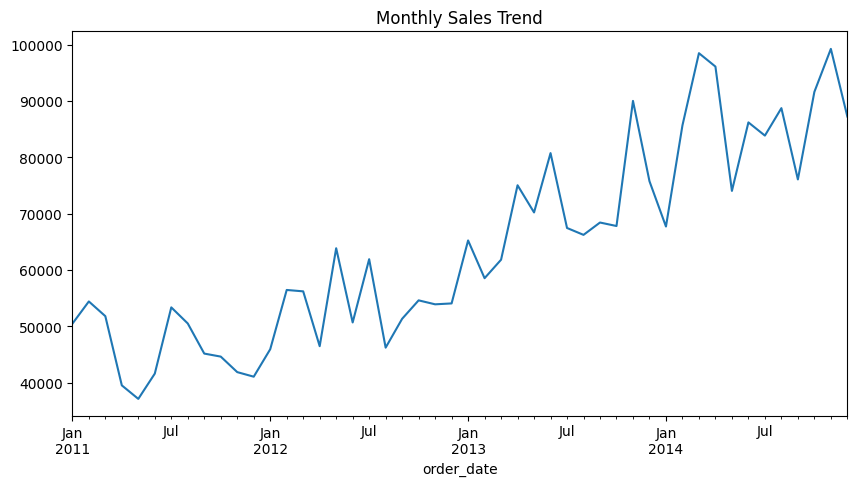

In [26]:
# Finding the monthly sales over time.
monthly_sales = df.resample("ME", on="order_date")["sales"].sum()

# Plotting it.
monthly_sales.plot(title="Monthly Sales Trend", figsize=(10,5))
plt.show()


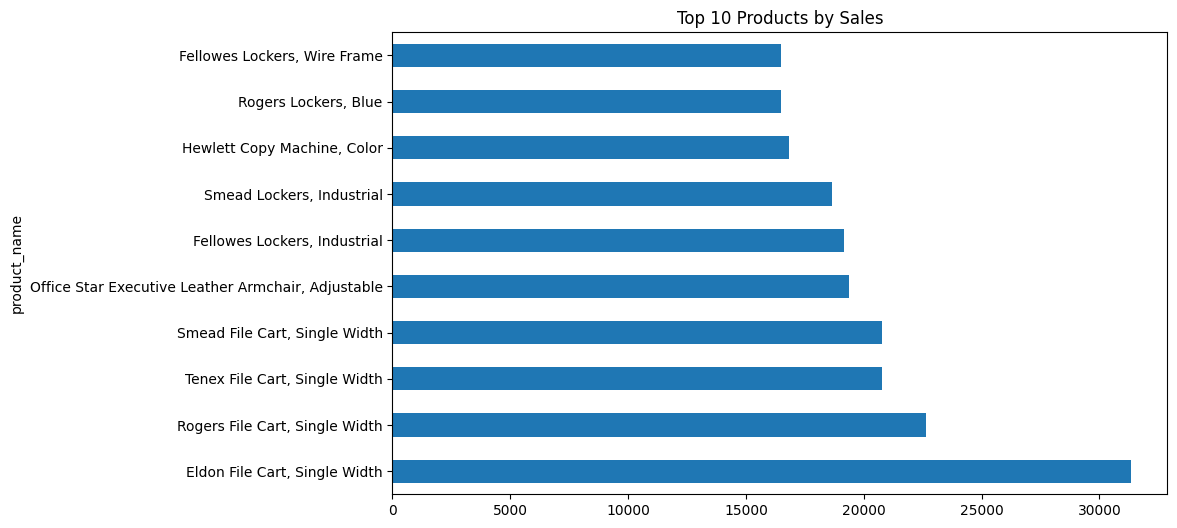

In [27]:
# Finding the top 10 products that sold well.
top_products = df.groupby("product_name")["sales"].sum().sort_values(ascending=False).head(10)

top_products.plot(kind="barh", title="Top 10 Products by Sales", figsize=(10,6))
plt.show()


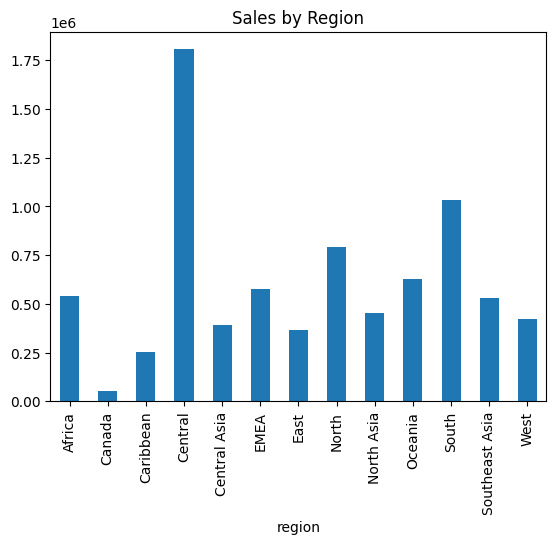

In [28]:
# Finding the sales per region.
region_sales = df.groupby("region")["sales"].sum()

region_sales.plot(kind="bar", title="Sales by Region")
plt.show()


In [ ]:
# Saving the clean data.
df.to_csv("data/clean_SuperStoreOrders.csv", index=False)
